# PPI prediction for EC2 network

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
#%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as mpatches
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score, matthews_corrcoef, f1_score
from sklearn.model_selection import cross_val_score
import logging
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
from scipy.stats import ttest_ind
import scipy.stats  as stats
import networkx as nx
from joblib import dump, load
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedShuffleSplit
import pickle
import xgboost as xgb
#print(sklearn.__version__)
import import_ipynb
from PPI_functions import *
network_name='EC2'


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]
importing Jupyter notebook from PPI_functions.ipynb
1.25.2
1.4.4
3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


## source of data
## https://github.com/mlbioinfolab/ppi-metago/blob/master/protein_pair/EC2/EC2_pair.txt

## publication: https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2907-1

In [2]:
#path_h="/Users/temih/Dropbox/PPI_similarity_new/data/"   # windows
path_h="/Users/hamidteimouri/Dropbox/PPI_similarity_new/data/" # mac


# Step0: Visualization of the network

In [3]:
#G4=network_vis('EC2',path_h)
#!pip install xgboost scikit-learn


# Step 1: Feature extraction using propy


#Descriptors_complete('EC2_sequence_fasta.txt','EC2_descriptors.csv')

# Step 2: Calculate PP distance

In [4]:
# distance_PP('EC2')

# Step 3: Upload data and train/test spilit

In [5]:
X,y,klist,df3=load_network_data(network_name, path_h)



In [6]:
ns = 18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

# Step 4: Train logistic and SVM models using all features

In [7]:
all_features_traning_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [8]:
all_features_traning_results

{'average logistic regression accuracy:': 0.9398946360153256,
 'average SVM accuracy:': 0.8914930555555556,
 'average logistic regression recall:': 0.9399650608596475,
 'average SVM recall:': 0.8917093729275852,
 'average logistic regression matthews_corrcoef:': 0.8817142373779274,
 'average SVM matthews_corrcoef:': 0.7994531549781552,
 'average logistic regression f1 score:': 0.8817142373779274,
 'average SVM f1 score:': 0.7994531549781552}

In [9]:

## Save dat into pickle file
data_save = {}
data_save['all_features_traning_results']=all_features_traning_results

## now we check if model overfits

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=5
Y = y
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    results = models_overfitting(X_train, Y_train, X_test, Y_test)


Processing cross validation for fold: 1


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression train_accuracy: 0.9348
Logistic Regression test_accuracy: 0.7763
Logistic Regression train_recall: 0.9349
Logistic Regression test_recall: 0.7763
Logistic Regression train_mcc: 0.8715
Logistic Regression test_mcc: 0.5528
Logistic Regression train_f1: 0.9327
Logistic Regression test_f1: 0.7787


SVC train_accuracy: 0.8858
SVC test_accuracy: 0.8151
SVC train_recall: 0.8860
SVC test_recall: 0.8152
SVC train_mcc: 0.7906
SVC test_mcc: 0.6371
SVC train_f1: 0.8721
SVC test_f1: 0.8009


Processing cross validation for fold: 2


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression train_accuracy: 0.9348
Logistic Regression test_accuracy: 0.7892
Logistic Regression train_recall: 0.9349
Logistic Regression test_recall: 0.7893
Logistic Regression train_mcc: 0.8714
Logistic Regression test_mcc: 0.5796
Logistic Regression train_f1: 0.9328
Logistic Regression test_f1: 0.7832


SVC train_accuracy: 0.8890
SVC test_accuracy: 0.7742
SVC train_recall: 0.8892
SVC test_recall: 0.7744
SVC train_mcc: 0.7935
SVC test_mcc: 0.5591
SVC train_f1: 0.8772
SVC test_f1: 0.7506


Processing cross validation for fold: 3


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression train_accuracy: 0.9413
Logistic Regression test_accuracy: 0.7957
Logistic Regression train_recall: 0.9413
Logistic Regression test_recall: 0.7958
Logistic Regression train_mcc: 0.8845
Logistic Regression test_mcc: 0.5935
Logistic Regression train_f1: 0.9394
Logistic Regression test_f1: 0.7875


SVC train_accuracy: 0.8966
SVC test_accuracy: 0.7849
SVC train_recall: 0.8968
SVC test_recall: 0.7852
SVC train_mcc: 0.8089
SVC test_mcc: 0.5849
SVC train_f1: 0.8856
SVC test_f1: 0.7585


Processing cross validation for fold: 4


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression train_accuracy: 0.9386
Logistic Regression test_accuracy: 0.8065
Logistic Regression train_recall: 0.9387
Logistic Regression test_recall: 0.8065
Logistic Regression train_mcc: 0.8794
Logistic Regression test_mcc: 0.6144
Logistic Regression train_f1: 0.9365
Logistic Regression test_f1: 0.8000


SVC train_accuracy: 0.8944
SVC test_accuracy: 0.7935
SVC train_recall: 0.8946
SVC test_recall: 0.7938
SVC train_mcc: 0.8041
SVC test_mcc: 0.6002
SVC train_f1: 0.8833
SVC test_f1: 0.7703


Processing cross validation for fold: 5


/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression train_accuracy: 0.9407
Logistic Regression test_accuracy: 0.7634
Logistic Regression train_recall: 0.9408
Logistic Regression test_recall: 0.7635
Logistic Regression train_mcc: 0.8835
Logistic Regression test_mcc: 0.5289
Logistic Regression train_f1: 0.9388
Logistic Regression test_f1: 0.7534


SVC train_accuracy: 0.8928
SVC test_accuracy: 0.7591
SVC train_recall: 0.8930
SVC test_recall: 0.7595
SVC train_mcc: 0.8021
SVC test_mcc: 0.5423
SVC train_f1: 0.8811
SVC test_f1: 0.7186




# Step 5: Feature Selection Using Lasso Regression

In [11]:
AA=0.004
ns = 18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)
featuredict_lasso = lasso_feature_selection(Xtrain_cv,Ytrain_cv,AA,ns,klist)
featuredict_lasso

AW -0.1156977970983498
RK 0.07775448856909244
NP -0.0811475111413294
DD -0.04771243034113729
DP -0.051138019179674664
CA -0.07059630202244488
EK 0.06370888046747103
QQ -0.07662578503362104
GW -0.1304825269913923
IK 0.07253236092642311
IT 0.04534417617027601
KD 0.07562480309668757
KQ 0.10688901969133245
KV 0.11273978274422605
ML -0.16754290495692864
FR 0.054769094713613284
PI 0.034962464049202974
SQ -0.07139735007255386
SY -0.08877854337135785
TH -0.0786706215462586
YN -0.09866221250029843
YD -0.0791037312985126
YQ -0.07867203569457677
YL -0.16278612205053766
VE 0.04142795483185068
MoranAuto_Steric26 0.09107533175428344
MoranAuto_Mutability27 0.08314588438716645
MoranAuto_Mutability28 0.06257492599819563
GearyAuto_Steric11 0.05064539887939157
_ChargeC2 -0.26990707440460904
_ChargeD2100 0.058602057733980716
PAAC11 -0.1506567805611492
PAAC18 -0.15391956988158195
APAAC5 -0.1588286154205655
APAAC11 -0.07441384572919865


{'AW': -0.1156977970983498,
 'RK': 0.07775448856909244,
 'NP': -0.0811475111413294,
 'DD': -0.04771243034113729,
 'DP': -0.051138019179674664,
 'CA': -0.07059630202244488,
 'EK': 0.06370888046747103,
 'QQ': -0.07662578503362104,
 'GW': -0.1304825269913923,
 'IK': 0.07253236092642311,
 'IT': 0.04534417617027601,
 'KD': 0.07562480309668757,
 'KQ': 0.10688901969133245,
 'KV': 0.11273978274422605,
 'ML': -0.16754290495692864,
 'FR': 0.054769094713613284,
 'PI': 0.034962464049202974,
 'SQ': -0.07139735007255386,
 'SY': -0.08877854337135785,
 'TH': -0.0786706215462586,
 'YN': -0.09866221250029843,
 'YD': -0.0791037312985126,
 'YQ': -0.07867203569457677,
 'YL': -0.16278612205053766,
 'VE': 0.04142795483185068,
 'MoranAuto_Steric26': 0.09107533175428344,
 'MoranAuto_Mutability27': 0.08314588438716645,
 'MoranAuto_Mutability28': 0.06257492599819563,
 'GearyAuto_Steric11': 0.05064539887939157,
 '_ChargeC2': -0.26990707440460904,
 '_ChargeD2100': 0.058602057733980716,
 'PAAC11': -0.15065678056114

In [12]:
data_save['selected_features_lasso']=featuredict_lasso

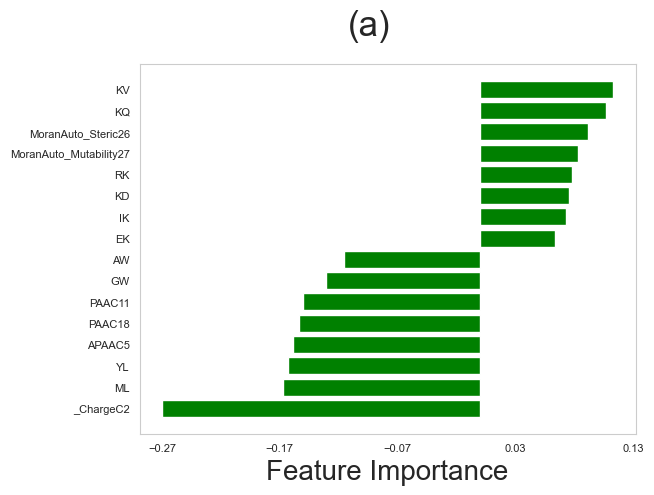

In [13]:

sorted_dict = sorted(featuredict_lasso.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.1
selected_features_plotter(featuredict,network_name,'lasso',20,dr)


## Now we train model using features selection from LASSO mothod

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.7985
Logistic Regression test_accuracy: 0.8129
Logistic Regression train_recall: 0.7986
Logistic Regression test_recall: 0.8130
Logistic Regression train_mcc: 0.6007
Logistic Regression test_mcc: 0.6272
Logistic Regression train_f1: 0.7873
Logistic Regression test_f1: 0.8071


SVC train_accuracy: 0.8572
SVC test_accuracy: 0.8280
SVC train_recall: 0.8574
SVC test_recall: 0.8281
SVC train_mcc: 0.7309
SVC test_mcc: 0.6650
SVC train_f1: 0.8408
SVC test_f1: 0.8131


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.8028
Logistic Regression test_accuracy: 0.7978
Logistic Regression train_recall: 0.8029
Logistic Regression test_recall: 0.7980
Logistic Regression train_mcc: 0.6092
Logistic Regression test_mcc: 0.5985
Logistic Regression train_f1: 0.7920
Logistic Regression test_f1: 0.7883


SVC train_accuracy: 0.8588
SVC test_accuracy: 0.7978
SVC train_recall: 0.8591
SVC test_recall: 0.798

In [15]:
scaled_features_df=df3
cols=list(featuredict_lasso.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    
    i+=1
    #print(i)
    

In [16]:
# traning metrics
lasso_results = models_crossval(Xtrain_cv,Ytrain_cv,ns)
lasso_results

{'average logistic regression accuracy:': 0.8073275862068965,
 'average SVM accuracy:': 0.8622844827586207,
 'average logistic regression recall:': 0.8074316635314336,
 'average SVM recall:': 0.8625033094126662,
 'average logistic regression matthews_corrcoef:': 0.6176925086250893,
 'average SVM matthews_corrcoef:': 0.7402110742610454,
 'average logistic regression f1 score:': 0.6176925086250893,
 'average SVM f1 score:': 0.7402110742610454}

In [17]:
data_save['lasso_results']=lasso_results

# Step 7: Feature Selection Using Support Vector Machine

In [18]:
ns = 18
Xtrain_cv, Xtest_cv, Ytrain_cv, Ytest_cv=cross_val_split(X,y,ns)

In [19]:

CC = linear_SVM_grid_search(X,y,ns)
#CC=0.2
CC

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/hamidteimouri/opt/anaconda3/lib/python3.9/sit

0.1

In [20]:
featuredict_svm = svm_feature_selection(Xtrain_cv,Ytrain_cv,CC,ns,klist)
featuredict_svm

K -0.6728804765145369
AN 0.12888269274137465
AM -0.10214802695115027
RK 0.15197448131534882
NP -0.15579587673310924
NS 0.28136483598610085
DI -0.3628251664899984
CA -0.20792672532224007
CN -0.3736769944108969
CF -0.3765178160469926
CV -0.13095903258267647
QN -0.18526371998108282
QQ -0.1605096484821473
GW -0.46386396644578515
ID -0.2980519015960415
IK 0.27737736067435265
LM -0.1131869037087345
LS -0.2322411504401875
LY -0.14805900060334987
KN 0.1469831057959562
KD 0.13647350546015447
KQ 0.2752685923356762
KI 0.20174707925047225
KP 0.31967406996374653
KV 0.13658454881123072
MR 0.1708811086628455
MN -0.2473148026592088
ML -0.3446075733131928
FM -0.18950155674048644
PI 0.11255964964787893
SN -0.13219381194369706
SL -0.148733500514575
TH -0.17714778360704975
TT 0.12534035225908616
YA -0.16660955772871838
YD -0.22084406172558843
YQ -0.20590256587931477
YL -0.23565293781428778
YM -0.27460665227209163
YP -0.2510033940550638
MoranAuto_Mutability27 0.23922207136363394
GearyAuto_Mutability1 0.107

{'K': -0.6728804765145369,
 'AN': 0.12888269274137465,
 'AM': -0.10214802695115027,
 'RK': 0.15197448131534882,
 'NP': -0.15579587673310924,
 'NS': 0.28136483598610085,
 'DI': -0.3628251664899984,
 'CA': -0.20792672532224007,
 'CN': -0.3736769944108969,
 'CF': -0.3765178160469926,
 'CV': -0.13095903258267647,
 'QN': -0.18526371998108282,
 'QQ': -0.1605096484821473,
 'GW': -0.46386396644578515,
 'ID': -0.2980519015960415,
 'IK': 0.27737736067435265,
 'LM': -0.1131869037087345,
 'LS': -0.2322411504401875,
 'LY': -0.14805900060334987,
 'KN': 0.1469831057959562,
 'KD': 0.13647350546015447,
 'KQ': 0.2752685923356762,
 'KI': 0.20174707925047225,
 'KP': 0.31967406996374653,
 'KV': 0.13658454881123072,
 'MR': 0.1708811086628455,
 'MN': -0.2473148026592088,
 'ML': -0.3446075733131928,
 'FM': -0.18950155674048644,
 'PI': 0.11255964964787893,
 'SN': -0.13219381194369706,
 'SL': -0.148733500514575,
 'TH': -0.17714778360704975,
 'TT': 0.12534035225908616,
 'YA': -0.16660955772871838,
 'YD': -0.2208

In [21]:
data_save['selected_features_svm']=featuredict_svm

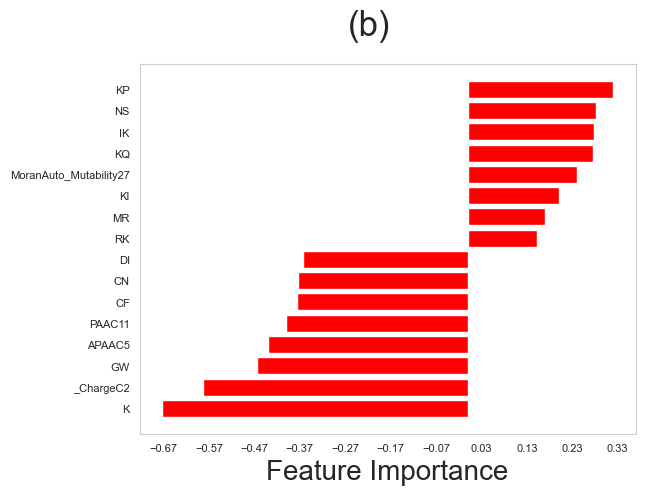

In [22]:

sorted_dict = sorted(featuredict_svm.items(), key=lambda x: x[1])
# Get the 10 highest positive keys
positive_keys = dict(sorted_dict[-8:])
# Get the 10 lowest negative keys
negative_keys = dict(sorted_dict[:8])
# Create a new dictionary containing the selected keys
new_dict = {**positive_keys, **negative_keys}
featuredict=new_dict
dr=0.1
selected_features_plotter(featuredict,network_name,'svm',20,dr)


## Training models using selected features from SVM

In [23]:
scaled_features_df=df3

cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
i = 0
from sklearn.model_selection import StratifiedShuffleSplit

Xtrain_cv = list(range(ns))
Xtest_cv = list(range(ns))
Ytrain_cv = list(range(ns))
Ytest_cv = list(range(ns))

cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
for train_index, test_index in cv.split(XX, y):
    Xtrain_cv[i] = XX[train_index]
    Xtest_cv[i] = XX[test_index]
    Ytrain_cv[i] = y[train_index]
    Ytest_cv[i] = y[test_index]
    i+=1

In [24]:
results_svm = models_crossval(Xtrain_cv,Ytrain_cv,ns)
results_svm

{'average logistic regression accuracy:': 0.81459530651341,
 'average SVM accuracy:': 0.8795797413793103,
 'average logistic regression recall:': 0.814692372997257,
 'average SVM recall:': 0.8797761340383093,
 'average logistic regression matthews_corrcoef:': 0.6318902390114197,
 'average SVM matthews_corrcoef:': 0.7722873557786811,
 'average logistic regression f1 score:': 0.6318902390114197,
 'average SVM f1 score:': 0.7722873557786811}

In [25]:
data_save['results_svm']=results_svm

# check for overfitting

In [26]:
from sklearn.model_selection import StratifiedShuffleSplit
# Your initial setup
ns=10
scaled_features_df=df3
mean_accu_log=0
mean_accu_svm=0
mean_recall_log=0
mean_recall_svm=0
mean_mcc_log=0
mean_mcc_svm=0
mean_f1_log=0
mean_f1_svm=0
cols=list(featuredict_svm.keys())
XX=np.array(scaled_features_df[cols])
cv = StratifiedShuffleSplit(n_splits=ns, test_size=0.2, random_state=999)
fold_num=0
# Splitting
for train_index, test_index in cv.split(XX, y):
    X_train, X_test = XX[train_index], XX[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    # Now you have a train-test split, you can proceed with your analysis
    # For instance, 
    fold_num += 1  # Increment the fold counter
    print('Processing cross validation for fold:', fold_num)
    #results = models_overfitting2(X_train, Y_train, X_test, Y_test)
    #... rest of your code
    results = models_overfitting(X_train, Y_train, X_test, Y_test)
    mean_accu_log = mean_accu_log + results['logistic_regression']['test_accuracy']
    mean_accu_svm = mean_accu_svm + results['svc']['test_accuracy']
    mean_recall_log = mean_recall_log + results['logistic_regression']['test_recall']
    mean_recall_svm = mean_recall_svm + results['svc']['test_recall']
    mean_mcc_log = mean_mcc_log + results['logistic_regression']['test_mcc']
    mean_mcc_svm = mean_mcc_svm + results['svc']['test_mcc']
    mean_f1_log = mean_f1_log + results['logistic_regression']['test_f1']
    mean_f1_svm = mean_f1_svm + results['svc']['test_f1']
    
print('mean accuracy for log regression is' , mean_accu_log/ns)
print('mean accuracy for svm is' , mean_accu_svm/ns)
print('mean recall for log regression is' , mean_recall_log/ns)
print('mean recall for svm is' , mean_recall_svm/ns)
print('mean mcc for log regression is' , mean_mcc_log/ns)
print('mean mcc for svm is' , mean_mcc_svm/ns)
print('mean f1 for log regression is' , mean_f1_log/ns)
print('mean f1 for svm is' , mean_f1_svm/ns)

Processing cross validation for fold: 1
Logistic Regression train_accuracy: 0.8071
Logistic Regression test_accuracy: 0.8194
Logistic Regression train_recall: 0.8072
Logistic Regression test_recall: 0.8194
Logistic Regression train_mcc: 0.6165
Logistic Regression test_mcc: 0.6399
Logistic Regression train_f1: 0.7991
Logistic Regression test_f1: 0.8142


SVC train_accuracy: 0.8761
SVC test_accuracy: 0.8301
SVC train_recall: 0.8763
SVC test_recall: 0.8303
SVC train_mcc: 0.7649
SVC test_mcc: 0.6688
SVC train_f1: 0.8641
SVC test_f1: 0.8159


Processing cross validation for fold: 2
Logistic Regression train_accuracy: 0.8109
Logistic Regression test_accuracy: 0.8172
Logistic Regression train_recall: 0.8110
Logistic Regression test_recall: 0.8174
Logistic Regression train_mcc: 0.6249
Logistic Regression test_mcc: 0.6418
Logistic Regression train_f1: 0.8016
Logistic Regression test_f1: 0.8028


SVC train_accuracy: 0.8777
SVC test_accuracy: 0.8366
SVC train_recall: 0.8779
SVC test_recall: 0.836

In [27]:
with open(network_name+'_results.pkl' , 'wb') as file:
    pickle.dump(data_save,file)

In [28]:
with open(network_name+'_results.pkl' , 'rb') as file:
    load_data=pickle.load(file)
    